In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
origin = pd.read_csv("../dataset/results-2021-12-18.csv")
origin

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


In [3]:
groups = origin.groupby("algorithm")
single_algo_datas = {k: v for k, v in groups}

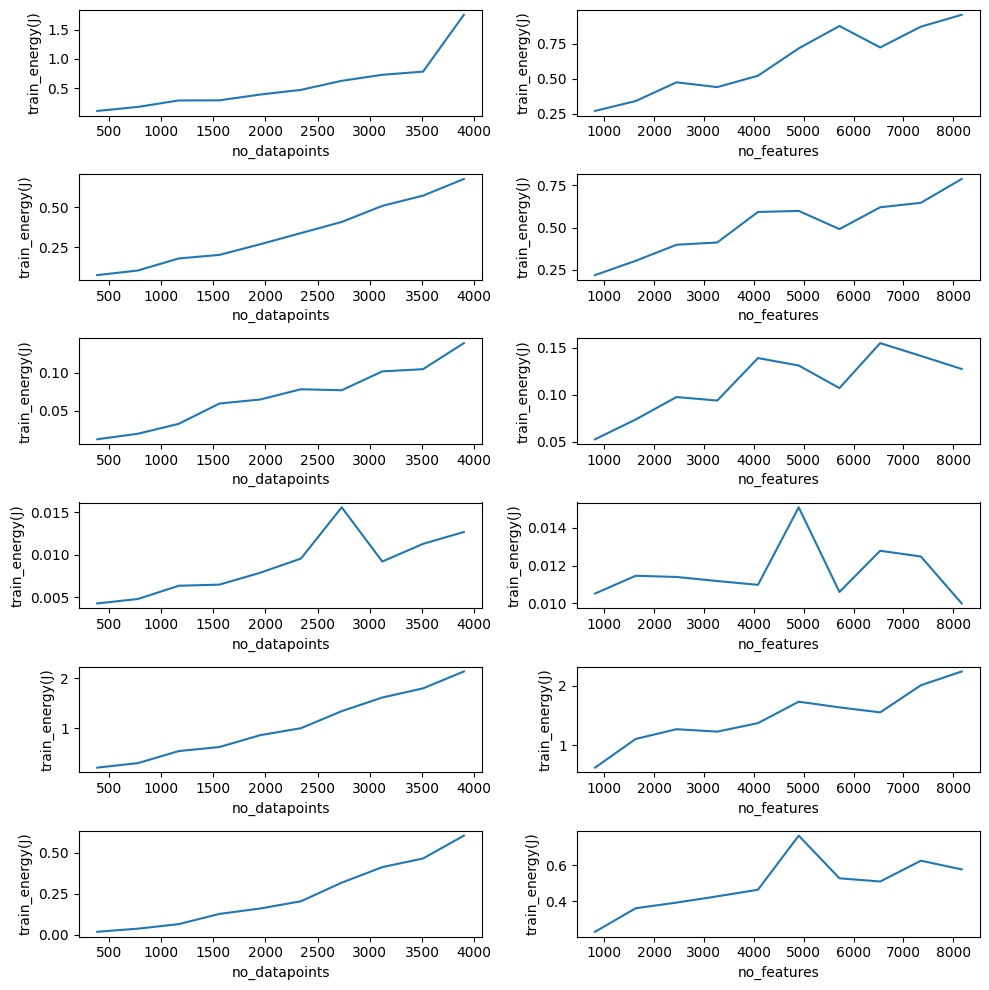

In [4]:
fig, ax = plt.subplots(6, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
grids = pd.DataFrame(ax, index=single_algo_datas.keys(), columns=["no_datapoints", "no_features"])

for algo, data in single_algo_datas.items():
    rq_2_1 = data[data["RQ"] == 2.1][["no_datapoints", "train_energy(J)"]]
    avgs = rq_2_1.groupby("no_datapoints").mean()
    grids["no_datapoints"][algo].plot(avgs.index, avgs["train_energy(J)"])
    grids["no_datapoints"][algo].set_xlabel("no_datapoints")
    grids["no_datapoints"][algo].set_ylabel("train_energy(J)")

for algo, data in single_algo_datas.items():
    rq_2_1 = data[data["RQ"] == 2.2][["no_features", "train_energy(J)"]]
    avgs = rq_2_1.groupby("no_features").mean()
    grids["no_features"][algo].plot(avgs.index, avgs["train_energy(J)"])
    grids["no_features"][algo].set_xlabel("no_features")
    grids["no_features"][algo].set_ylabel("train_energy(J)")

fig.tight_layout()

In [5]:
grids

,no_datapoints,no_features
AdaBoost,"AxesSubplot(0.0839184,0.879252;0.403277x0.105748)","AxesSubplot(0.581723,0.879252;0.403277x0.105748)"
Bagging Classifier,"AxesSubplot(0.0839184,0.715085;0.403277x0.105748)","AxesSubplot(0.581723,0.715085;0.403277x0.105748)"
Decision Tree,"AxesSubplot(0.0839184,0.550918;0.403277x0.105748)","AxesSubplot(0.581723,0.550918;0.403277x0.105748)"
KNN,"AxesSubplot(0.0839184,0.386752;0.403277x0.105748)","AxesSubplot(0.581723,0.386752;0.403277x0.105748)"
Random Forest,"AxesSubplot(0.0839184,0.222585;0.403277x0.105748)","AxesSubplot(0.581723,0.222585;0.403277x0.105748)"
SVM,"AxesSubplot(0.0839184,0.0584184;0.403277x0.105...","AxesSubplot(0.581723,0.0584184;0.403277x0.105748)"
